# Factors Affecting Carbon Export in the Global Ocean

### Research Computing Final Project Fall 2021

### Annie Leal

The general scope of this project is to explore the factors which affect carbon export in the ocean. Carbon export ($F(POC)_{ex}$) is defined as the process by which carbon, which has been incorporated into biomass in the surface ocean through photosynthesis, is transported to the deep ocean. This process effectively sequesters the carbon from the atmosphere and has a large effect on atmospheric CO$_{2}$ concentrations. There are many factors which determine the proportion of fixed carbon that sinks out of the surface ocean. Here, we will examine how net primary productivity ($NPP$) and surface nutrients impact carbon export in addition to evaluating some satellite based estimates of $F(POC)_{ex}$. 

For this project, carbon export will functionally be defined as carbon that sinks deeper than the euphotic zone.

In [1]:
# Install and import relevant packages

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pooch

### 1. Load SIMPLE-TRIM carbon export model

This first dataset is a carbon export model output that is based on assimilated satellite and tracer data. It takes regional community composition into account along with NPP and sea surface temperature (SST) measurements. 

In [2]:
# load and clean the dataset

simple_trim_url = 'http://tdevries.eri.ucsb.edu/wp-content/uploads/2018/03/SIMPLE_TRIM_output.nc'

file_path = pooch.retrieve(url=simple_trim_url,
                          known_hash='md5:95467187b0d29e66b4d5ed0c58a101af')

trim = xr.open_dataset(file_path).load()
trim = trim.set_coords(['LAT', 'LON'])
trim = trim.where(trim != -9.999)

# Fix values for latitude and longitude
trim['longitude'] = ((trim.longitude)*2)
trim['latitude'] = ((trim.latitude-45)*2)
trim

Updating data from 'http://tdevries.eri.ucsb.edu/wp-content/uploads/2018/03/SIMPLE_TRIM_output.nc' to file '/home/jovyan/.cache/pooch/e4a0a4525472949384e03b3f13eddc14-SIMPLE_TRIM_output.nc'.


<xarray.Dataset>
Dimensions:      (depth: 24, longitude: 180, latitude: 91, version: 12)
Coordinates:
    LAT          (depth, longitude, latitude) float64 -89.01 -87.03 ... 89.01
    LON          (depth, longitude, latitude) float64 1.0 1.0 ... 359.0 359.0
  * longitude    (longitude) int64 0 2 4 6 8 10 12 ... 348 350 352 354 356 358
  * latitude     (latitude) int64 -90 -88 -86 -84 -82 -80 ... 80 82 84 86 88 90
Dimensions without coordinates: depth, version
Data variables: (12/51)
    mask         (depth, longitude, latitude) float64 0.0 0.0 0.0 ... 0.0 0.0
    DEPTH        (depth, longitude, latitude) float64 18.07 18.07 ... 5.433e+03
    Volume       (depth, longitude, latitude) float64 3.051e+10 ... 5.348e+11
    Area         (longitude, latitude) float64 8.443e+08 2.532e+09 ... 8.443e+08
    NPP          (version, longitude, latitude) float64 0.0 0.0 ... 30.44 0.0
    Zeu          (depth, longitude, latitude) float64 nan nan nan ... 12.69 nan
    ...           ...
    k_SL         (version) float64 0.5202 0.3849 0.4704 ... 0.1846 0.4463 0.282
    k_SR         (version) float64 0.009652 0.003778 ... 0.008886 0.003197
    k_R          (version) float64 4.935e-05 1.341e-05 ... 4.586e-05 1.134e-05
    npp_version  (version) float64 0.0 1.0 0.0 1.0 0.0 ... 1.0 0.0 1.0 0.0 1.0
    phistar      (version) float64 1.0 1.0 0.5 0.5 2.0 ... 1.0 0.5 0.5 2.0 2.0
    mind_large   (version) float64 5.0 5.0 5.0 5.0 5.0 ... 20.0 20.0 20.0 20.0

Visualize annual, global averages of $NPP$ and measured $F(POC)_{ex}$ from this dataset.

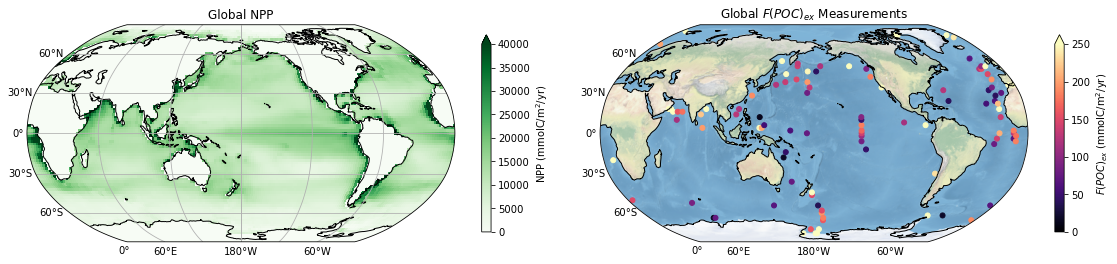

In [3]:
plot_proj = ccrs.Robinson(central_longitude=180)
fig, ax = plt.subplots(figsize=(16,14), ncols=2, subplot_kw={'projection': plot_proj})

# Plot NPP
NPP_plot = trim.NPP.mean(axis=0).plot(x='longitude', y='latitude', transform=ccrs.PlateCarree() ,ax=ax[0], vmin=0, vmax=40000, add_colorbar=False, cmap='Greens')
ax[0].add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax[0].set_title('Global NPP')
cb_1 = plt.colorbar(NPP_plot, ax=ax[0], shrink=0.2, extend='max')
cb_1.set_label('NPP (mmolC/m$^{2}$/yr)')
gl_1 = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_1.top_labels=False
gl_1.xformatter = LONGITUDE_FORMATTER
gl_1.yformatter = LATITUDE_FORMATTER

# Change dimensions of the observed F(POC) array
trim['FPOC_ex_obs'] = trim.POCfluxobs.max(axis=0)

# Plot measured F(POC)ex
FPOCobs_plot = xr.plot.scatter(x='longitude', y='latitude', ds=trim, hue='FPOC_ex_obs', transform=ccrs.PlateCarree(), vmin=0, vmax=250, ax=ax[1], add_guide=False, cmap='magma', s=25)
ax[1].add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax[1].set_title('Global $F(POC)_{ex}$ Measurements')
ax[1].stock_img()
cb_2 = plt.colorbar(FPOCobs_plot, ax=ax[1], shrink=0.2, extend='max')
cb_2.set_label('$F(POC)_{ex}$ (mmolC/m$^{2}$/yr)')
gl_2 = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_2.top_labels=False
gl_2.xlines=False
gl_2.ylines=False
gl_2.xformatter = LONGITUDE_FORMATTER
gl_2.yformatter = LATITUDE_FORMATTER
fig.tight_layout();

From the plot of NPP on the left, we can see that there is high NPP in the near margin region in all ocean basins. There is also high NPP near the Intertropical Convergence Zone (ITCZ) where there is upwelling. NPP is low in the sub-tropical gyres. 

The figure on the right panel shows observed values of $F(POC)_{ex}$ . There is a lot of variability in these measurements and there is limited spatial coverage; however, it can be seen that there is relatively high $F(POC)_{ex}$ in the northern regions of the Indian ocean, the high latitudes of the North Pacific Basin, the ITCZ, the Peru Current, in the Ross Sea, and near the Canary Current off the western coast of Africa. These fluxes seem to generally follow the same trends as NPP. It should be noted that there is a difference of two orders of magnitude between these two, so only a small fraction of global NPP is exported to the deep ocean.

Since there is such limited spatial covereage of these measurements, models of $F(POC)_{ex}$ are necessary to more accurately understand the carbon cycle in the ocean. Now let us look at some model estimates.

### 2. Laws Algorithm carbon export calculation

The Laws Algorithtm for carbon export as described in Laws et al. 2011 is a mathematical relationship that estimates the fraction of carbon exported ($ef$) based on $SST$ and $NPP$. This fraction can then be multiplied by $NPP$ to get $F(POC)_{ex}$. Using this method removes any dependence on regional community structure differences in the estimate and reduces this to a first-order problem.

$ef = 0.04756 * (0.78 - (0.43* \frac{SST}{30})) (\frac{NPP}{12})^{0.307}$

$F(POC)_{ex} = NPP * ef$

In [4]:
SST = trim.Temp.where(trim.DEPTH < 20).mean(axis=0)
NPP = trim.NPP.mean(axis=0)

ef = 0.04756 * (0.78 - (0.43 * SST / 30)) * (NPP/12)**0.307
trim['laws'] = ef * NPP
trim.laws

<xarray.DataArray 'laws' (longitude: 180, latitude: 91)>
array([[       nan,        nan,        nan, ..., 1.54890976, 1.55220212,
               nan],
       [       nan,        nan,        nan, ..., 1.54500838, 1.55052795,
               nan],
       [       nan,        nan,        nan, ..., 1.54204749, 1.54923625,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 1.55451695, 1.55442405,
               nan],
       [       nan,        nan,        nan, ..., 1.55376349, 1.55440108,
               nan],
       [       nan,        nan,        nan, ..., 1.55186237, 1.5536595 ,
               nan]])
Coordinates:
  * longitude  (longitude) int64 0 2 4 6 8 10 12 ... 346 348 350 352 354 356 358
  * latitude   (latitude) int64 -90 -88 -86 -84 -82 -80 ... 80 82 84 86 88 90

### 3. Comparison of the two estimates of carbon export

Visualize the SIMPLE-TRIM model and the Laws Algorithm estimates of $F(POC)_{ex}$ side by side.

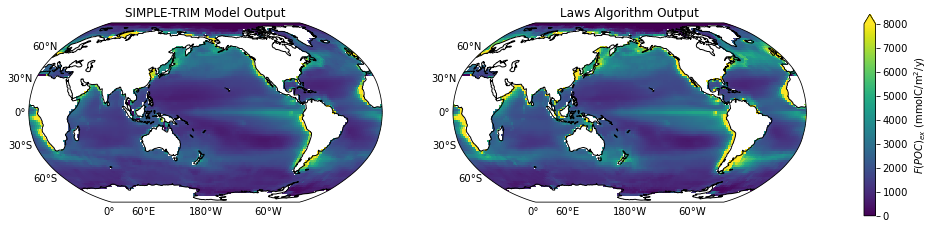

In [5]:
fig, ax = plt.subplots(figsize=(16,14), ncols=2, subplot_kw={'projection': plot_proj})

# Plot SIMPLE-TRIM Output
trim_export = trim.FPOCex.mean(axis=0).plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(), vmin=0, vmax=8000, ax=ax[0], add_colorbar=False)
ax[0].add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax[0].set_title('SIMPLE-TRIM Model Output')

# Plot Laws Algorithm result
laws_plot = trim.laws.plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(), ax=ax[1], vmin=0, vmax=8000, add_colorbar=False)
ax[1].add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax[1].set_title('Laws Algorithm Output')

# Add Colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.01, 0.2])
fig.colorbar(laws_plot, cax=cbar_ax, shrink=0.1, extend='max', label='$F(POC)_{ex}$ (mmolC/m$^{2}$/y)')

# Add latitude and longitude labels to axes
gl_1 = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_1.top_labels=False
gl_1.xlines=False
gl_1.ylines=False
gl_1.xformatter = LONGITUDE_FORMATTER
gl_1.yformatter = LATITUDE_FORMATTER
gl_2 = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_2.top_labels=False
gl_2.xlines=False
gl_2.ylines=False
gl_2.xformatter = LONGITUDE_FORMATTER
gl_2.yformatter = LATITUDE_FORMATTER;

In the above figures, it appears that the Laws Algorithm yields higher carbon export values in the margin proximal regions at low latitudes. Both agree well in the Southern Ocean and gyre regions in all ocean basins. The region with the most apparent difference between these two estimates lies north of 70 $^{\circ}$N. The first thing to note is missing data in the SIMPLE_TRIM output. However, this is likely an artifact of a lack of data during winter or the presence of sea ice, and this can be disregarded. Additionally, the SIMPLE-TRIM model seems to have higher fluxes in some of the high latitude northern seas.

Let us quantify the differences between these two $F(POC)_{ex}$ estimates by taking their difference.

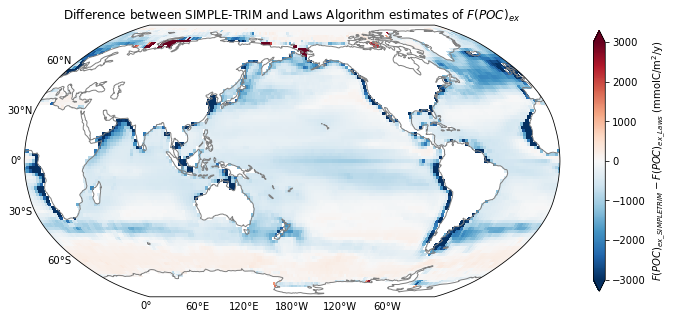

In [6]:
diff = trim.FPOCex.mean(axis=0) - trim.laws

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

diff_plot = diff.plot(x='longitude', y='latitude', transform=ccrs.PlateCarree() ,ax=ax, vmin=-3000, vmax=3000, add_colorbar=False, cmap='RdBu_r')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax.set_title('Difference between SIMPLE-TRIM and Laws Algorithm estimates of $F(POC)_{ex}$')
cb = plt.colorbar(diff_plot, ax=ax, shrink=0.8, extend='both')
cb.set_label('$F(POC)_{ex\_SIMPLETRIM} - F(POC)_{ex\_Laws}$ (mmolC/m$^{2}$/y)')
# Add axes lat/lon labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels=False
gl.xlines=False
gl.ylines=False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER;

Red indicates SIMPLE-TRIM has a higher estimate, and blue indicates Laws Algorithm has a higher estimate of $F(POC)_{ex}$.

From this figure, we see that the Laws Algorithm yields higher estimates in much of the ocean. The models agree well in the subtropical gyre regions. In low latitude margin proximal, high latitude North Atlantic, and ITCZ regions the Laws Algorithm has significantly higher estimates of $F(POC)_{ex}$ than the SIMPLE-TRIM model.

The SIMPLE-TRIM model has slightly higher estimates of $F(POC)_{ex}$ at high polar latitudes. It also has much higher estimates at some high latitude ses where there is deep water formation as well as in the Indonesian Throughflow. This model takes into account community structure as well as tracer data, so could deep convective mixing result in higher $F(POC)_{ex}$ values? We will come back to this question later by looking at nutrient concentrations.

Let us now compare these estimates to observed particulate organic carbon fluxes ($F(POC)$) by calculating the model error.

$error$ = $model \; estimate - measured \; F(POC)_{ex}$

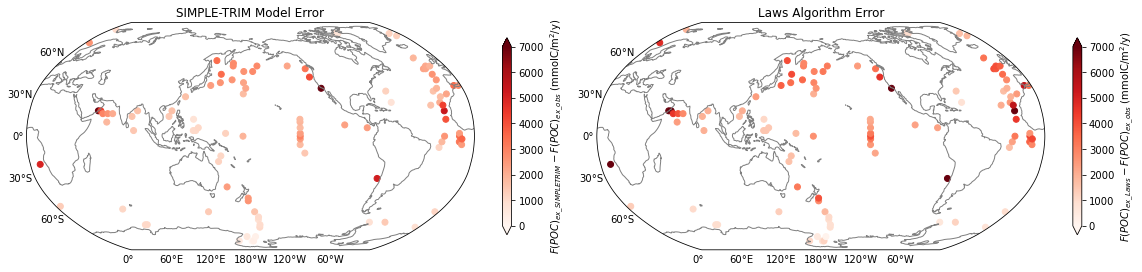

In [7]:
# Calculate error
trim['simple_obs'] = trim.FPOCex.mean(axis=0) - trim.FPOC_ex_obs
trim['laws_obs'] = trim.laws - trim.FPOC_ex_obs

# Plot errors for both estimates
fig, ax = plt.subplots(figsize=(16, 14), ncols=2, subplot_kw={'projection':plot_proj})

simple_plot = xr.plot.scatter(x='longitude', y='latitude', ds=trim, hue='simple_obs', transform=ccrs.PlateCarree(), vmin=0, vmax=7000, ax=ax[0], add_guide=False, cmap='Reds')
ax[0].add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax[0].set_title('SIMPLE-TRIM Model Error')
cb_1 = plt.colorbar(simple_plot, ax=ax[0], shrink=0.2, extend='both')
cb_1.set_label('$F(POC)_{ex\_SIMPLETRIM} - F(POC)_{ex\_obs}$ (mmolC/m$^{2}$/y)')


laws_plot = xr.plot.scatter(x='longitude', y='latitude', ds=trim, hue='laws_obs', transform=ccrs.PlateCarree(), vmin=0, vmax=7000, ax=ax[1], add_guide=False, cmap='Reds')

ax[1].add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax[1].set_title('Laws Algorithm Error')
cb_2 = plt.colorbar(laws_plot, ax=ax[1], shrink=0.2, extend='both')
cb_2.set_label('$F(POC)_{ex\_Laws} - F(POC)_{ex\_obs}$ (mmolC/m$^{2}$/y)')
plt.tight_layout()
# Add axes lat/lon labels
gl_1 = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_1.top_labels=False
gl_1.xlines=False
gl_1.ylines=False
gl_1.xformatter = LONGITUDE_FORMATTER
gl_1.yformatter = LATITUDE_FORMATTER
gl_2 = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_2.top_labels=False
gl_2.xlines=False
gl_2.ylines=False
gl_2.xformatter = LONGITUDE_FORMATTER
gl_2.yformatter = LATITUDE_FORMATTER;


Both of these methods overestimate $F(POC)_{ex}$, and both seem to be most accurate in the Southern Ocean and in the western boundary of the South Pacific Basin. The estimates do not align well with the measured values in the North Atlantic and North Pacific basins.

Generally, the SIMPLE-TRIM model agrees more with the observed data, so regional differences in productivity and respiration play an important role in carbon export.

**Moving forward we will use the SIMPLE-TRIM model estimate.**

### 4. What factors affect the fraction of NPP exported?

An interesting quantity to investigate is ef. This quantity tells how much of the fixed carbon is actually sequestered. 

$ef = \frac{F(POC)_{ex}}{NPP}$

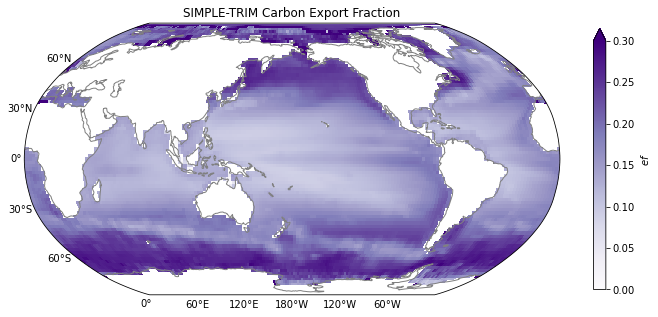

In [8]:
per_ex = trim.FPOCex.mean(axis=0) / trim.NPP.mean(axis=0)

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

per_ex_plot = per_ex.plot(x='longitude', y='latitude', transform=ccrs.PlateCarree() ,ax=ax, vmin=0, vmax=0.30, add_colorbar=False, cmap='Purples')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='grey')

ax.set_title('SIMPLE-TRIM Carbon Export Fraction')
cb = plt.colorbar(per_ex_plot, ax=ax, shrink=0.8, extend='max')
cb.set_label('$ef$')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels=False
gl.xlines=False
gl.ylines=False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER;

The above figure shows high ef at high latitudes and low ef at low latitudes. At high latitudes, where the temperature is much lower, a larger proportion of fixed carbon is exported. 

**This implies that the fraction of carbon exported is strongly dependent on temperature.** 


### 5. Load GEOTRACES IDP 2021 Trace Element and Isotope (TEI) data

In [9]:
dropbox_url = 'https://dl.dropboxusercontent.com/s/e9u1bwz5d0izspe/GEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v1.nc?dl=0'

file_path = pooch.retrieve(url=dropbox_url,
                           known_hash='md5:82e4a35dd37b78474c8c30346b31387d')

tei = xr.open_dataset(file_path)

# Clean dataset
tei = tei.rename({
    'N_STATIONS':'station',
    'N_SAMPLES':'depth',
    'metavar1':'cruise',
    'metavar2':'stn',
    'var2':'z', 
    'var4':'GEOTRACES_ID',
    'latitude':'LAT',
    'longitude':'LON',

    'var37':'phosphate',
    'var40':'nitrate',
    'var42':'nitrite',
    'var88':'dFe'
})

tei = tei.set_coords(['z', 'cruise', 'stn', 'LAT', 'LON'])
tei['cruise'] = tei['cruise'].astype(str)
tei


<xarray.Dataset>
Dimensions:       (station: 3149, depth: 698)
Coordinates:
    cruise        (station) <U6 'GA01' 'GA01' 'GA01' ... 'GSc02' 'GSc02' 'GSc02'
    stn           (station) |S26 ...
    LON           (station) float32 ...
    LAT           (station) float32 ...
    z             (station, depth) float32 ...
Dimensions without coordinates: station, depth
Data variables: (12/1583)
    metavar3      (station) |S1 ...
    metavar4      (station) float32 ...
    metavar5      (station) |S13 ...
    metavar6      (station) |S20 ...
    metavar7      (station) |S23 ...
    metavar8      (station) |S31 ...
    ...            ...
    var582        (station, depth) float32 ...
    var582_qc     (station, depth) float32 ...
    var583        (station, depth) float32 ...
    var583_qc     (station, depth) float32 ...
    var584        (station, depth) float32 ...
    var584_qc     (station, depth) float32 ...
Attributes:
    Conventions:         CF-1.7
    comment:             ODV NetCDF Export File V2.0
    Creator:             rschlitz@BGEO04M097-1
    CreateTime:          2021-11-11T08:45:54
    Software:            Ocean Data View 5.5.2 - 64 bit (Windows)
    source:              C:/GEOTRACES/IDP2021/output/data/seawater/GEOTRACES_...
    SourceLastModified:  2021-11-09T15:31:14
    DataField:           Ocean
    DataType:            Profiles
    Description:         GEOTRACES IDP2021 seawater discrete sample hydrograp...
    featureType:         profile

Create a new dataset that is only surface nutrient concentrations.

In [10]:
surface_data = xr.merge([
    tei.phosphate.sel(depth=0),
    tei.nitrate.sel(depth=0),
    tei.nitrite.sel(depth=0),
    tei.dFe.sel(depth=0)
], join='outer')
surface_data

<xarray.Dataset>
Dimensions:    (station: 3149)
Coordinates:
    cruise     (station) <U6 'GA01' 'GA01' 'GA01' ... 'GSc02' 'GSc02' 'GSc02'
    stn        (station) |S26 b'0' b'1' b'2' b'3' ... b'11' b'12' b'13' b'15'
    LON        (station) float32 349.3 350.0 350.5 350.4 ... 190.0 190.0 186.1
    LAT        (station) float32 38.43 40.33 40.33 ... -57.15 -56.18 -53.96
    z          (station) float32 2.957e+03 3.0 6.0 3.0 ... 25.4 25.7 24.9 24.8
Dimensions without coordinates: station
Data variables:
    phosphate  (station) float32 ...
    nitrate    (station) float32 ...
    nitrite    (station) float32 ...
    dFe        (station) float32 ...
Attributes:
    long_name:            PHOSPHATE_D_CONC_BOTTLE
    units:                umol/kg
    comment:              Concentration of dissolved phosphate, samples may o...
    ancillary_variables:  var37_qc var37_err
    C_format:             %.3f
    FORTRAN_format:       F12.3

### 6. Does nutrient availability impact $F(POC)_{ex}$?

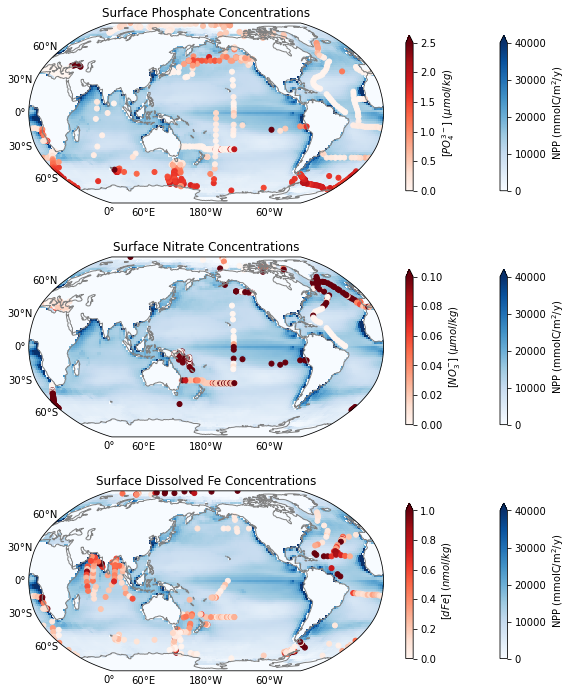

In [11]:
fig, ax = plt.subplots(figsize=(8,10), nrows=3, subplot_kw={'projection': plot_proj})

trim_export = trim.NPP.mean(axis=0).plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(), vmin=0, vmax=40000, ax=ax[0], add_colorbar=False, cmap='Blues')
phos = surface_data.plot.scatter(x='LON', y='LAT', hue='phosphate', transform=ccrs.PlateCarree(), ax=ax[0], vmin=0, vmax=2.5, add_guide=False, cmap='Reds', s=25)
ax[0].add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax[0].set_title('Surface Phosphate Concentrations')
plt.colorbar(trim_export, ax=ax[0], shrink=0.7, extend='max', label='NPP (mmolC/m$^{2}$/y)')
plt.colorbar(phos, ax=ax[0], shrink=0.7, extend='max', label='[$PO_{4}^{3-}$] ($\mu mol/kg$)')


trim_export = trim.NPP.mean(axis=0).plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(), vmin=0, vmax=40000, ax=ax[1], add_colorbar=False, cmap='Blues')
nit = surface_data.plot.scatter(x='LON', y='LAT', hue='nitrate', transform=ccrs.PlateCarree(), ax=ax[1], vmin=0, vmax=0.1, add_guide=False, cmap='Reds', s=25)
ax[1].add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax[1].set_title('Surface Nitrate Concentrations')
plt.colorbar(trim_export, ax=ax[1], shrink=0.7, extend='max', label='NPP (mmolC/m$^{2}$/y)')
plt.colorbar(nit, ax=ax[1], shrink=0.7, extend='max', label='[$NO_{3}^{-}$] ($\mu mol/kg$)')


trim_export = trim.NPP.mean(axis=0).plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(), vmin=0, vmax=40000, ax=ax[2], add_colorbar=False, cmap='Blues')
dfe = surface_data.plot.scatter(x='LON', y='LAT', hue='dFe', transform=ccrs.PlateCarree(), ax=ax[2], vmin=0, vmax=1, add_guide=False, cmap='Reds', s=25)
ax[2].add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax[2].set_title('Surface Dissolved Fe Concentrations')
plt.colorbar(trim_export, ax=ax[2], shrink=0.7, extend='max', label='NPP (mmolC/m$^{2}$/y)')
plt.colorbar(dfe, ax=ax[2], shrink=0.7, extend='max', label='[$dFe$] ($nmol/kg$)')

fig.tight_layout()

gl_1 = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_1.top_labels=False
gl_1.xlines=False
gl_1.ylines=False
gl_1.xformatter = LONGITUDE_FORMATTER
gl_1.yformatter = LATITUDE_FORMATTER
gl_2 = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_2.top_labels=False
gl_2.xlines=False
gl_2.ylines=False
gl_2.xformatter = LONGITUDE_FORMATTER
gl_2.yformatter = LATITUDE_FORMATTER
gl_3 = ax[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl_3.top_labels=False
gl_3.xlines=False
gl_3.ylines=False
gl_3.xformatter = LONGITUDE_FORMATTER
gl_3.yformatter = LATITUDE_FORMATTER;

Recall that $F(POC)_{ex} = NPP * ef$

We previously determined that $ef$ is a function of temperature. In order to determine more drivers of carbon export, we must also understand the factors affecting $NPP$. Primary productivity is often limited by nutrient availability. 

In the above figure, surface nutrient concentrations are plotted against $NPP$. Phosphate concentrations are high in the Southern Ocean and high latitudes in the North Pacific Basin. Equatorial regions show low phosphate content. High nitrate concentrations can be found at in the polar regions, south of the ITCZ in the Pacific Basin, and in the western South Pacific Basin. The subpolar gyres have nitrate depleted. Dissolved iron is abundant in the northern Indian Ocean and in North Atlantic gyre. These regions have high lithogenic inputs, which can explain these high trace metal signals. The Southern and Pacific Oceans show Fe depletion. These figures show that there is high regional variability in nutrient availability. 

No further conclusions can be drawn about the factors affecting NPP from these figures alone. There is not enough spatial coverage of the TEI data to determine how the availability of various nutrients affects NPP and $F(POC)_{ex}$.


### 7. Conclusions and Future Work

Based on the analyses in this project, it can be determined that the total amount of carbon exported from the euphotic zone is primarily driven by NPP in the surface ocean. The fraction of this fixed carbon that is exported is, to first-order, a function of temperature. 

NPP, and therefore $F(POC)_{ex}$, is likely dependent on nutrient availability. More data collection is required to more quantitatively determine the relationship between surface nutrient concentrations and $F(POC)_{ex}$.

Carbon export models can be useful tools to estimate $F(POC)_{ex}$ in regions of the ocean that are difficult to access and sample. It has been shown that models that incorporate regional differences in community and chemical composition are more accurate, but there is still a lot of error associated with these models.

Moving forward, future work should include:

1. Incorporating more model estimates of $F(POC)_{ex}$ to find a model that more accurately estimates export.
2. Increasing the spatial coverage of measured carbon and nutrient contents across all ocean basins.
3. Comparing modeled and observed $F(POC)_{ex}$ to the carbon export paleoproxy, particulate excess barium, to determine quantitatively the changes in carbon export over geologic timescales. This analysis would have been done in this project; however, there is not enough barium and thorium TEI data at any given location to perform the required calculations.